<a href="https://colab.research.google.com/github/GhostLate/Indoor-Object-Detection-via-RF-DETR/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Clone Github repository and Install Libs**

---



In [ ]:
!git clone https://github.com/GhostLate/Indoor-Object-Detection-via-RF-DETR.git

In [2]:
%cd Indoor-Object-Detection-via-RF-DETR/

/content/Indoor-Object-Detection-via-RF-DETR


In [ ]:
!pip install -r ./requirements.txt

# **2. Download & Unpack dataset**

---


In [ ]:
Clone!gdown 1GY4V3oA_b3Z8aPDJpmafDiE4R5k6Xl-L

In [ ]:
!mkdir dataset
!unzip -q Indoor\ Object\ Detection\ Dataset.zip -d ./dataset

In [ ]:
!mv ./dataset/Indoor\ Object\ Detection\ Dataset/* ./dataset
!rm -rf ./dataset/Indoor\ Object\ Detection\ Dataset

# **3. Prepare Dataset**

---

**To train RF-DETR, convert Indoor Object Detection dataset to COCO format:**

In [3]:
from prepare_coco import convert2coco
from split_coco import process_merge
from stat_coco import visualize_coco

In [4]:
data_dir = './dataset'

for i in range(1,7):
    convert2coco(i, data_dir)

Conversion complete! Saved to ./dataset/./sequence_1/_annotations.coco.json
Stats: 148 images, 241 annotations.
Conversion complete! Saved to ./dataset/./sequence_2/_annotations.coco.json
Stats: 217 images, 346 annotations.
Conversion complete! Saved to ./dataset/./sequence_3/_annotations.coco.json
Stats: 1154 images, 2685 annotations.
Conversion complete! Saved to ./dataset/./sequence_4/_annotations.coco.json
Stats: 278 images, 438 annotations.
Conversion complete! Saved to ./dataset/./sequence_5/_annotations.coco.json
Stats: 229 images, 466 annotations.
Conversion complete! Saved to ./dataset/./sequence_6/_annotations.coco.json
Stats: 187 images, 419 annotations.


**To view dataset statistics:**

100%|██████████| 11/11 [00:00<00:00, 97.57it/s]


/content/Indoor-Object-Detection-via-RF-DETR/stat_coco.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bbox, x="Sequence", y="Area", ax=ax4, palette="pastel", showfliers=False)


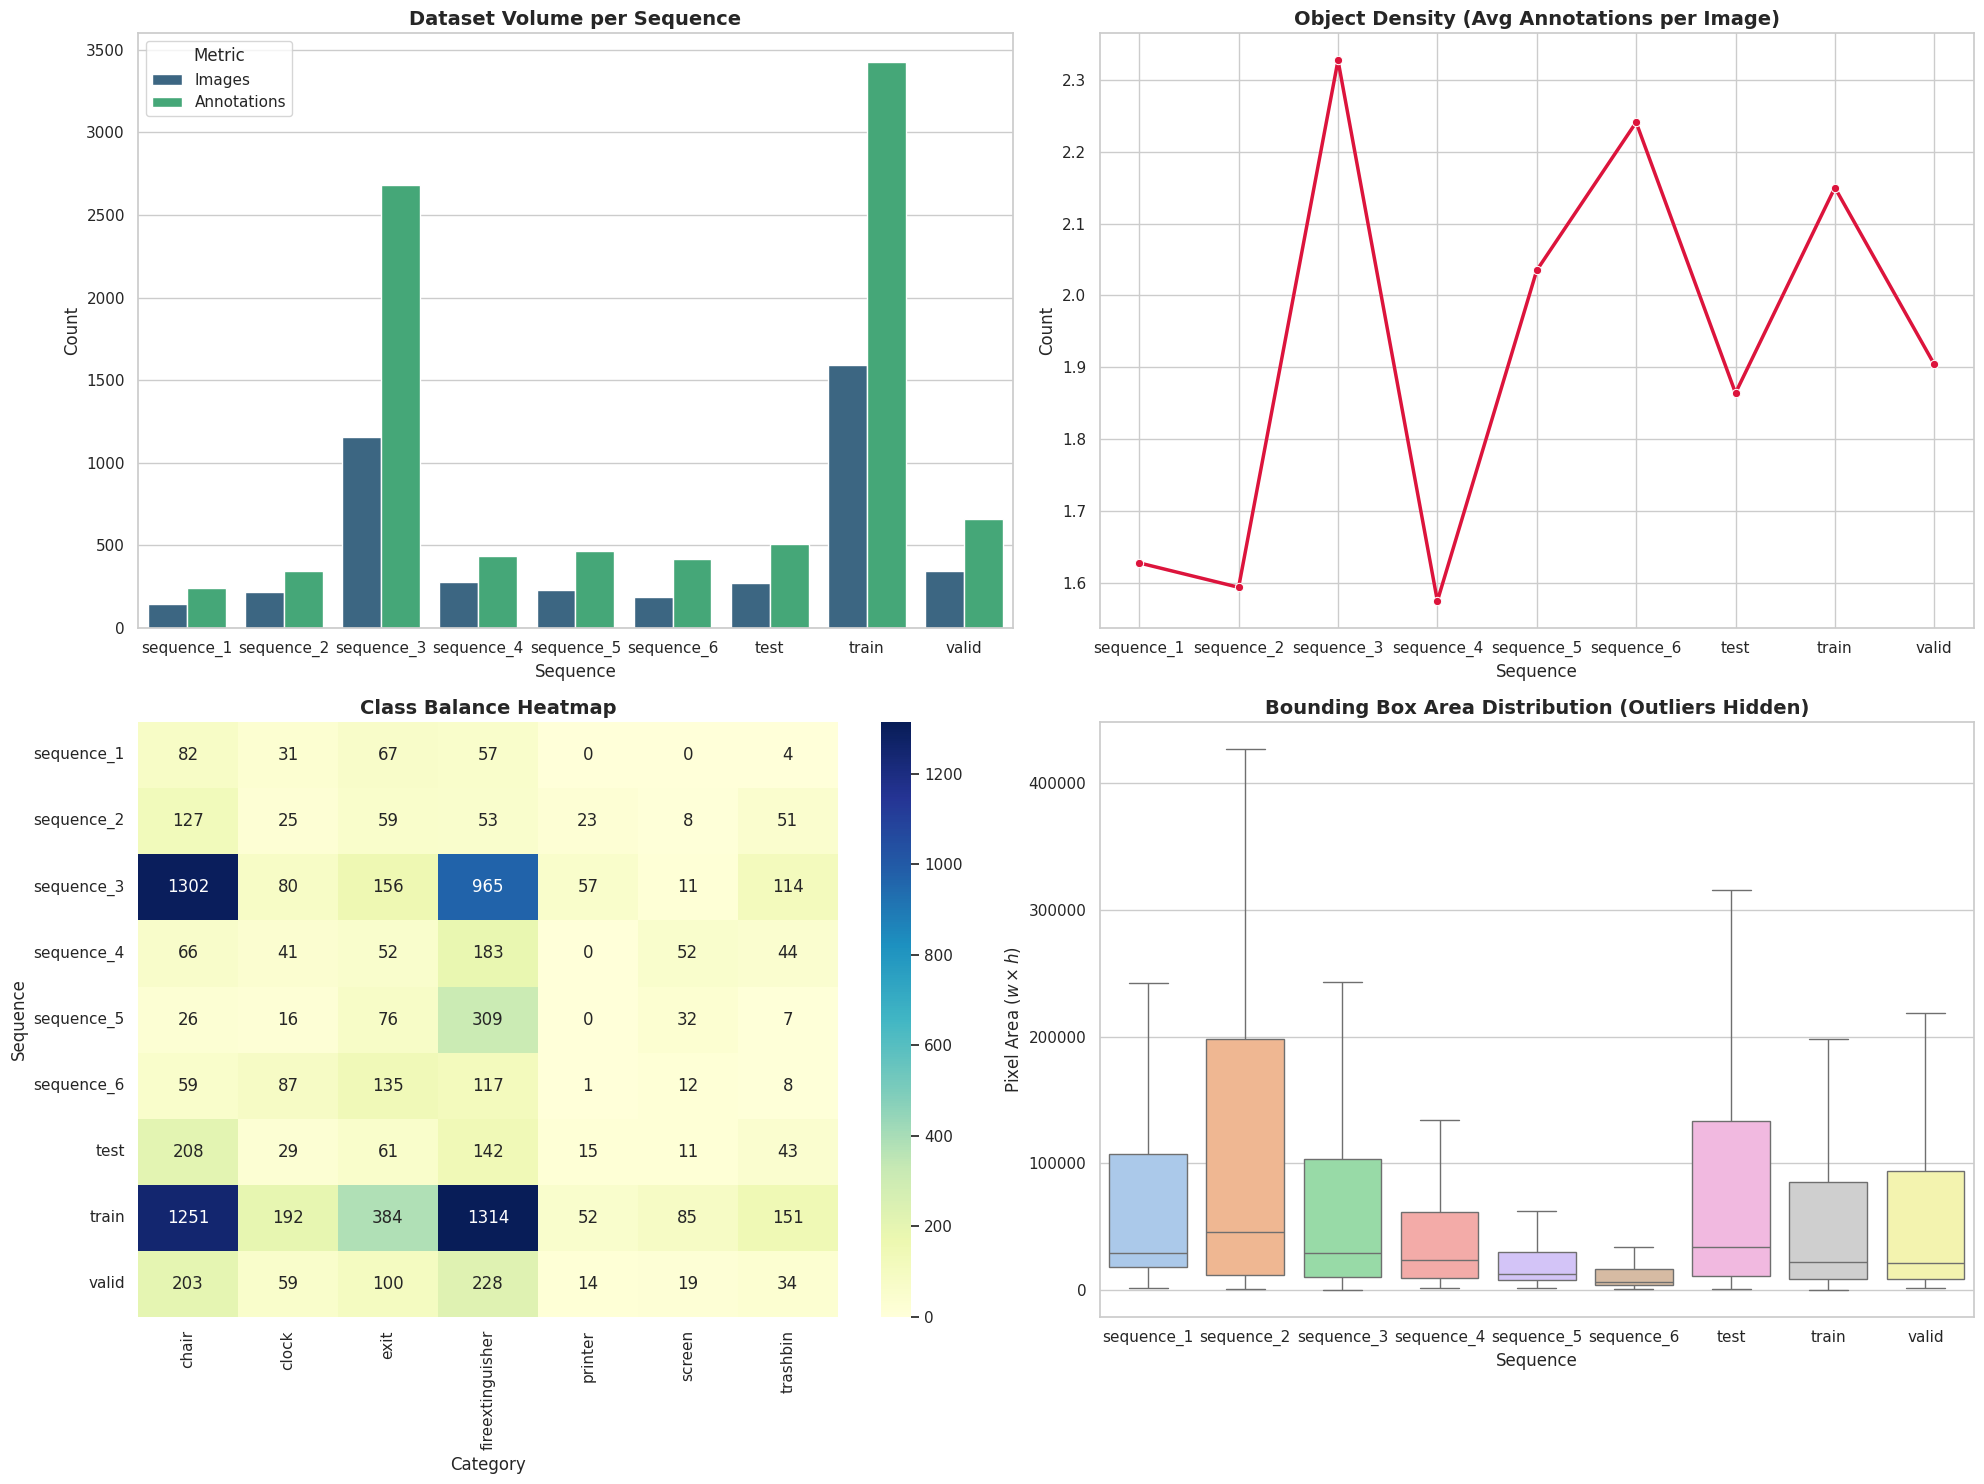


--- Summary Statistics ---
  Sequence  Images  Annotations  Categories  Avg Objects/Img
sequence_1     148          241           5         1.628378
sequence_2     217          346           7         1.594470
sequence_3    1154         2685           7         2.326690
sequence_4     278          438           6         1.575540
sequence_5     229          466           6         2.034934
sequence_6     187          419           7         2.240642
      test     273          509           7         1.864469
     train    1595         3429           7         2.149843
     valid     345          657           7         1.904348


In [5]:
data_dir = './dataset'
visualize_coco(data_dir)

**Split 6 dataset sequences to Train, Valid, Test:**

`splits` means we chop it up by `max_seq` batches by ratio of train, valid or test splits.

*(`train`, `valid`, `test` are required split names for `roboflow-coco` dataset format)*

In [6]:
strategy = {
    "sequence_1": {'splits': {'train': 0.8, 'valid': 0.2}, 'max_seq' : 5}, # sequence_1 for Train & Valid
    "sequence_2": {'splits': {'test': 0.6, 'valid': 0.4}, 'max_seq' : 5}, # sequence_2 only for Test & Valid
    "sequence_3": {'splits': {'train': 0.8, 'test': 0.1, 'valid': 0.1}, 'max_seq' : 40}, # sequence_3 for Train, Valid & Test, to fix class bias
    "sequence_4": {'splits': {'train': 0.8, 'test': 0.1, 'valid': 0.1}, 'max_seq' : 10}, # sequence_4 for Train, Valid & Test, to fix class bias
    "sequence_5": {'splits': {'train': 0.8, 'valid': 0.2}, 'max_seq' : 5}, # sequence_5 only for Train & Valid
    "sequence_6": {'splits': {'train': 0.8, 'valid': 0.2}, 'max_seq' : 5}, # sequence_6 only for Train & Valid
}

data_dir = './dataset'
save_dir = './dataset'

process_merge(strategy, data_dir, save_dir)

Processing sequence_1...
Saving train: 118 images, 195 annotations
Saving valid: 30 images, 46 annotations
Saving test: 0 images, 0 annotations
Processing sequence_2...
Saving train: 118 images, 195 annotations
Saving valid: 117 images, 184 annotations
Saving test: 130 images, 208 annotations
Processing sequence_3...
Saving train: 1041 images, 2368 annotations
Saving valid: 233 images, 438 annotations
Saving test: 245 images, 466 annotations
Processing sequence_4...
Saving train: 1263 images, 2719 annotations
Saving valid: 261 images, 482 annotations
Saving test: 273 images, 509 annotations
Processing sequence_5...
Saving train: 1446 images, 3095 annotations
Saving valid: 307 images, 572 annotations
Saving test: 273 images, 509 annotations
Processing sequence_6...
Saving train: 1595 images, 3429 annotations
Saving valid: 345 images, 657 annotations
Saving test: 273 images, 509 annotations


**View final dataset statistics with `train`, `valid`, `test` splits:**

100%|██████████| 11/11 [00:00<00:00, 329.30it/s]


/content/Indoor-Object-Detection-via-RF-DETR/stat_coco.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_bbox, x="Sequence", y="Area", ax=ax4, palette="pastel", showfliers=False)


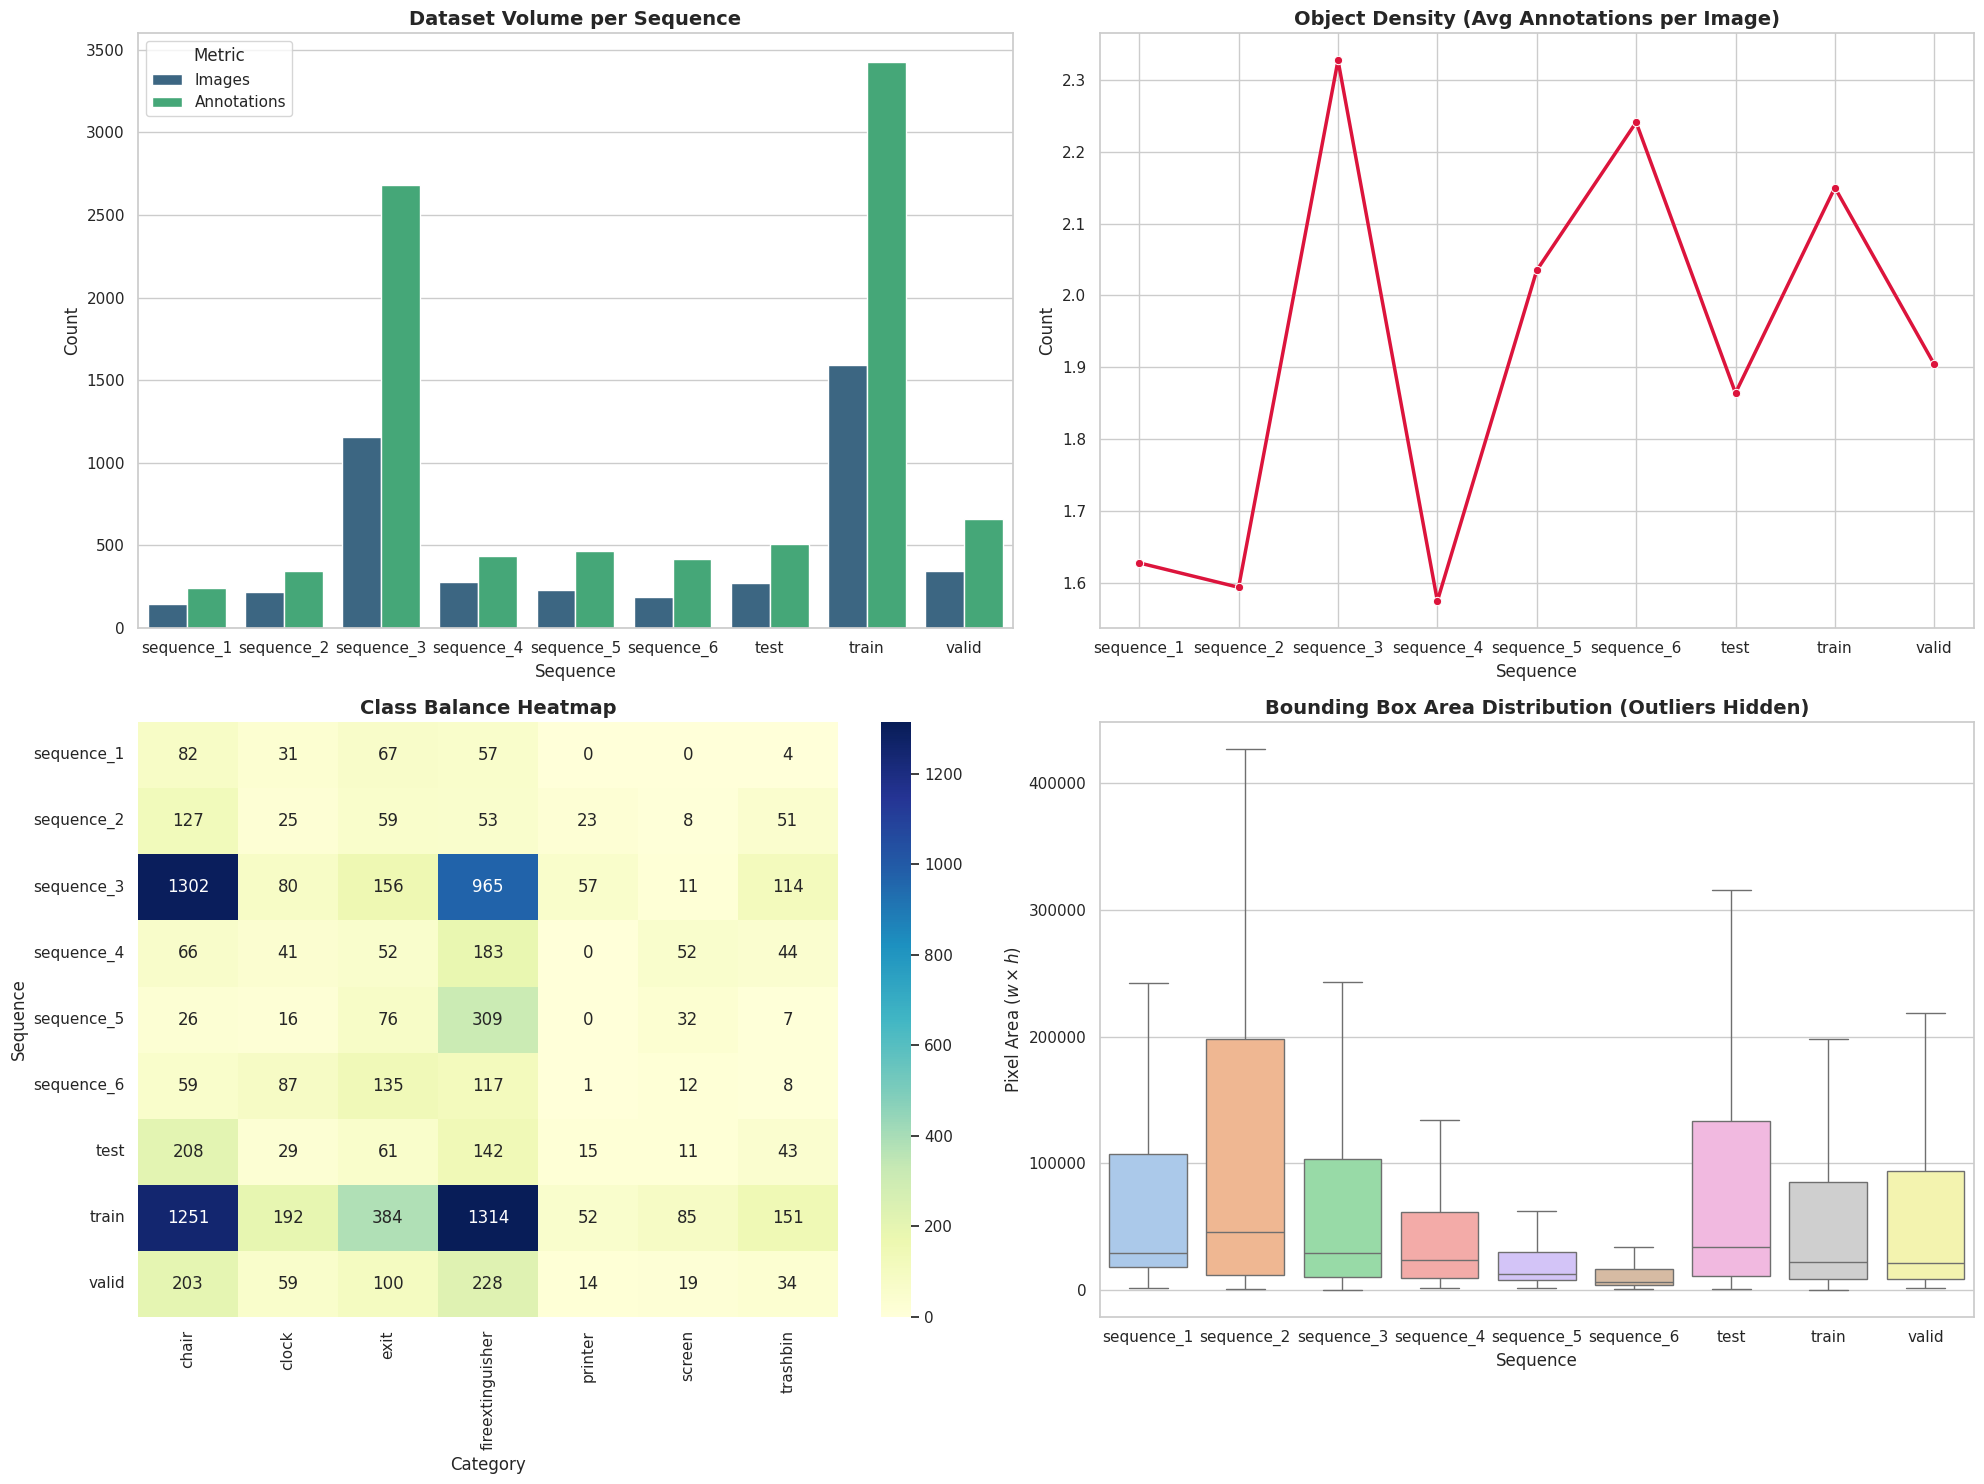


--- Summary Statistics ---
  Sequence  Images  Annotations  Categories  Avg Objects/Img
sequence_1     148          241           5         1.628378
sequence_2     217          346           7         1.594470
sequence_3    1154         2685           7         2.326690
sequence_4     278          438           6         1.575540
sequence_5     229          466           6         2.034934
sequence_6     187          419           7         2.240642
      test     273          509           7         1.864469
     train    1595         3429           7         2.149843
     valid     345          657           7         1.904348


In [7]:
data_dir = './dataset'
visualize_coco(data_dir)

# **4. Download fine-tuned model**

---

In [ ]:
!gdown 118-NLLbHEvON0qvxXqz_IsMbKN5SJUGG

In [ ]:
!mkdir -p output
!tar -Jxf epoch-10.tar.xz -C ./output

# **5. Run Eval**

---

**Eval model on `test` split:**

In [8]:
from tqdm import tqdm
import os

from rfdetr import RFDETRMedium

from core.data import CocoDataLoader
from core.metrics import DetectionMetrics
from core.utils import annotate_image
from core.visualization import draw_plots

In [9]:
weights = './output/epoch-10/checkpoint_best_total.pth'
data_dir = './dataset/'
split = 'test'
confidence = 0.4

Using a different number of positional encodings than DINOv2, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Using patch size 16 instead of 14, which means we're not loading DINOv2 backbone weights. This is not a problem if finetuning a pretrained RF-DETR model.
Loading pretrain weights


 99%|█████████▉| 270/273 [00:15<00:00, 17.61it/s]


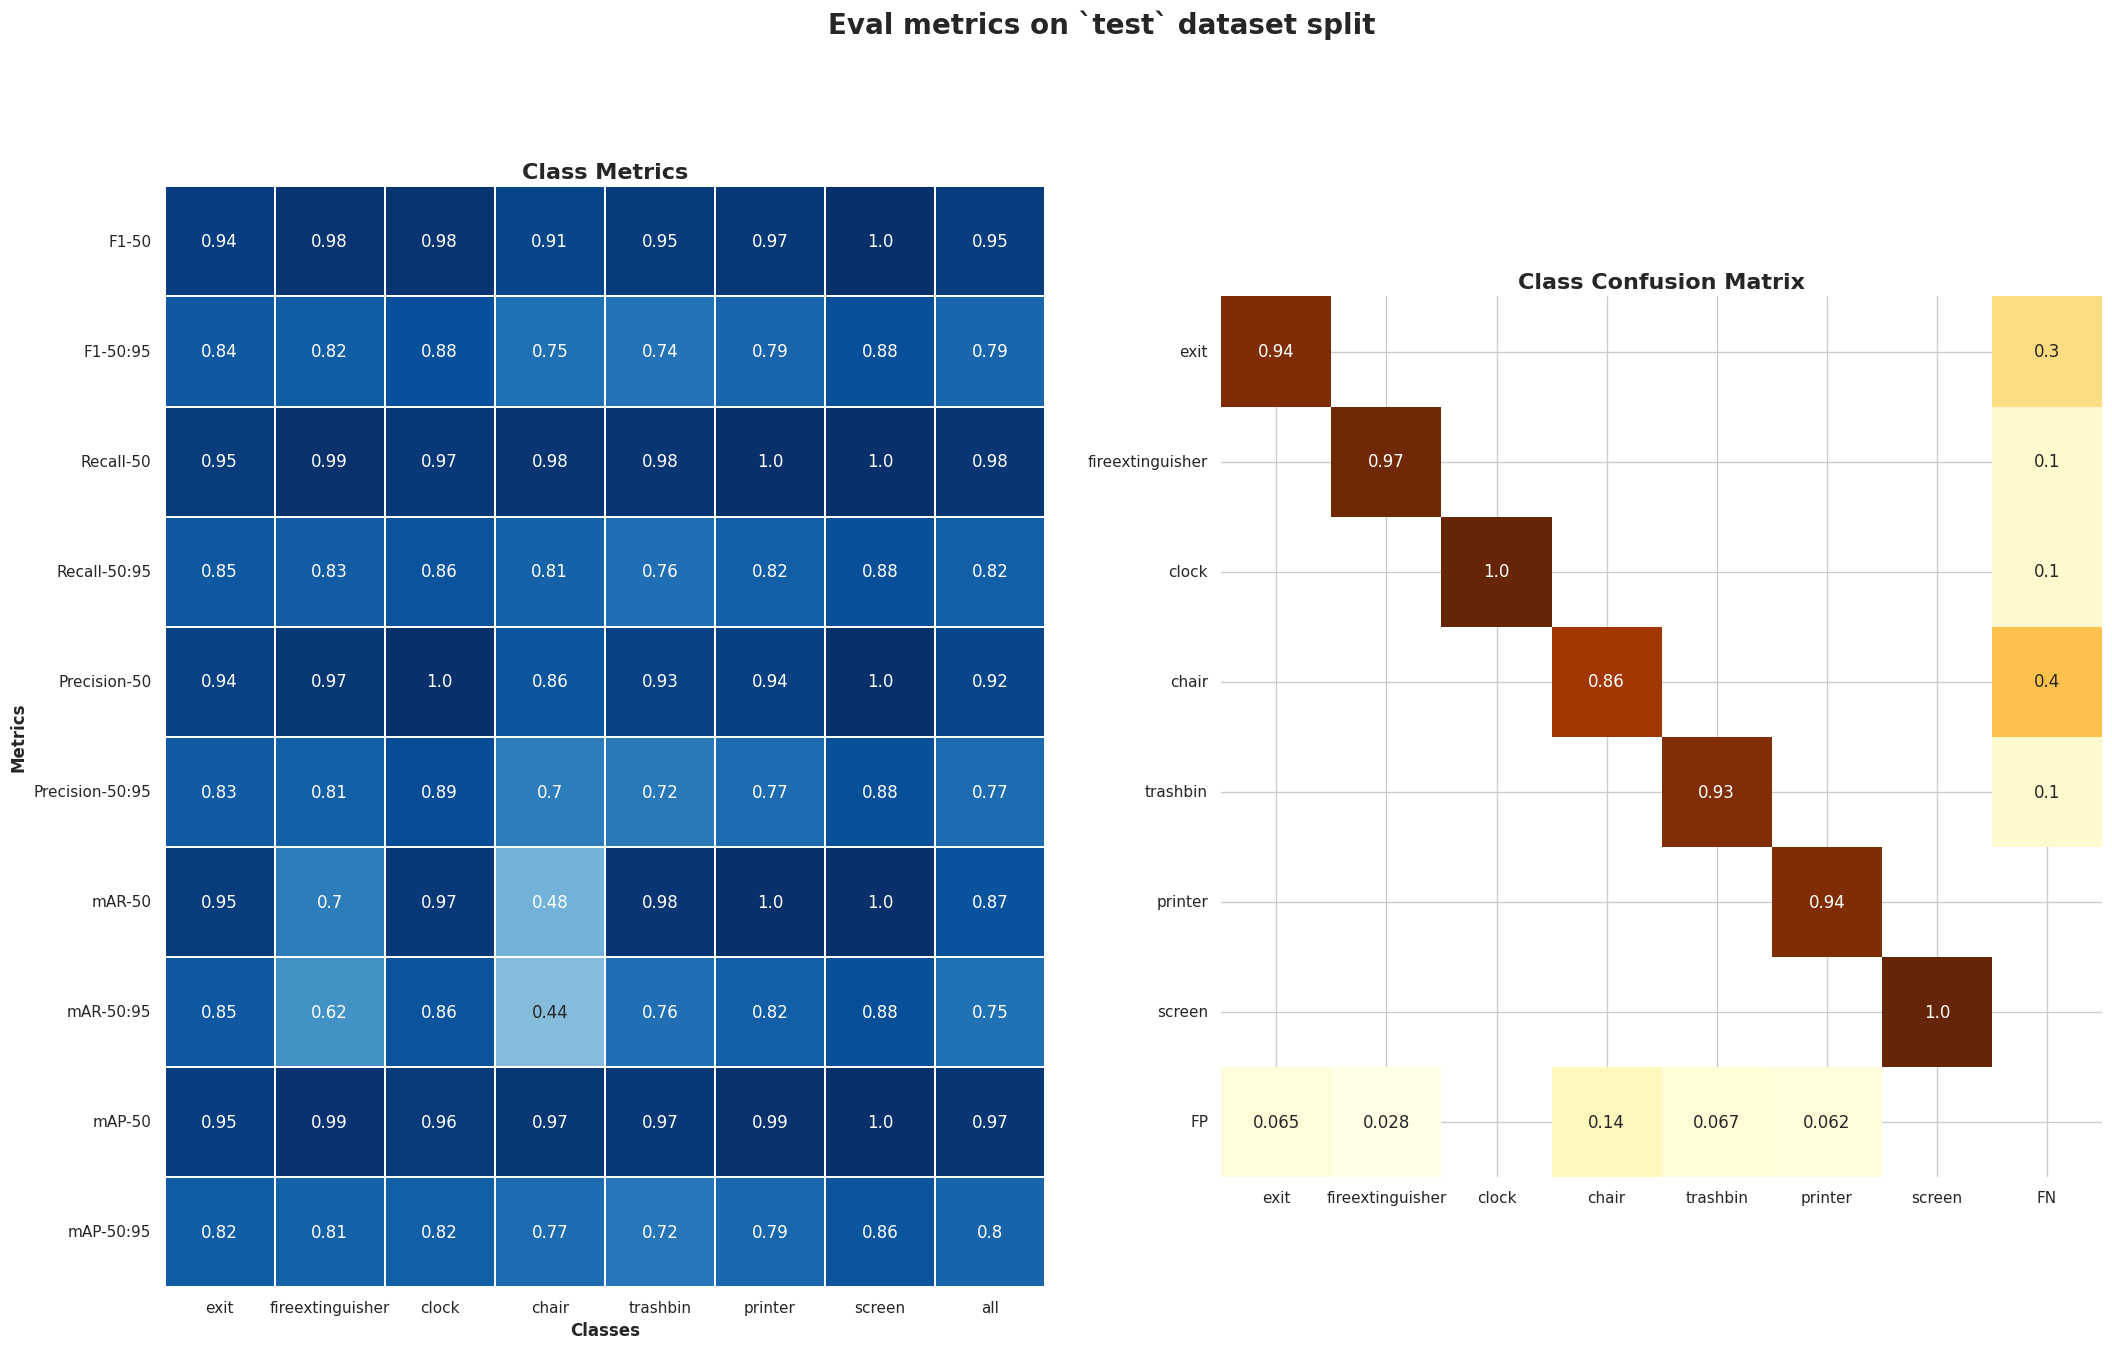

In [10]:
config = dict(
    pretrain_weights=weights,
    batch_size=12,
    num_classes=7,
)
data_loader = CocoDataLoader(data_dir, split)
metrics = DetectionMetrics(data_loader.class_names)
model = RFDETRMedium(**config)

# Process each image
for sample in tqdm(data_loader):
    detections = model.predict(sample['image'], threshold=confidence)
    metrics.update(detections, sample['annotations'])

metrics.visualize(title=f'Eval metrics on `{split}` dataset split')

**Run inference with dataset gt labels:**

In [ ]:
weights = './output/epoch-10/checkpoint_best_total.pth'
data_dir = './dataset/'
split = 'test'
confidence = 0.4
save_imgs = True
save_dir = './output/test-10'

In [ ]:
config = dict(
    pretrain_weights=weights,
    batch_size=12,
    num_classes=7,
)
data_loader = CocoDataLoader(data_dir, split)
model = RFDETRMedium(**config)

# Process each image
for sample in tqdm(data_loader):
    detections = model.predict(sample['image'], threshold=confidence)

    pred_image = annotate_image(sample['image'], detections, data_loader.class_names)
    gt_image = annotate_image(sample['image'], sample['annotations'], data_loader.class_names)

    if save_imgs:
        draw_plots({'pred': pred_image, 'gt': gt_image}, show=False,
                    save_path=os.path.join(save_dir, sample['image_meta']["file_name"]))
    else:
        draw_plots({'pred': pred_image, 'gt': gt_image}, show=True)

print(f"All images was saved at: {save_dir}")

# **Some good & bad predictions:**

In [11]:
import os.path

import numpy as np
from matplotlib import pyplot as plt


def draw_plots(depths_dict: dict[str, np.ndarray]):
    x = len(depths_dict.keys())
    y = 1

    plt.style.use('default')
    fig, axs = plt.subplots(x, y, layout='compressed', figsize=(y*15, x*15))

    if x == 1 or y == 1:
        for i, (name, depth) in enumerate(depths_dict.items()):
            p = axs[i].imshow(depth)
            fig.colorbar(p, ax=axs[i])
            axs[i].set_title(name)
    else:
        for i, (name, depth) in enumerate(depths_dict.items()):
            xi = int(i // y)
            yi = int(i % y)
            p = axs[xi, yi].imshow(depth)
            fig.colorbar(p, ax=axs[xi, yi])
            axs[xi, yi].set_title(name)

    plt.show()


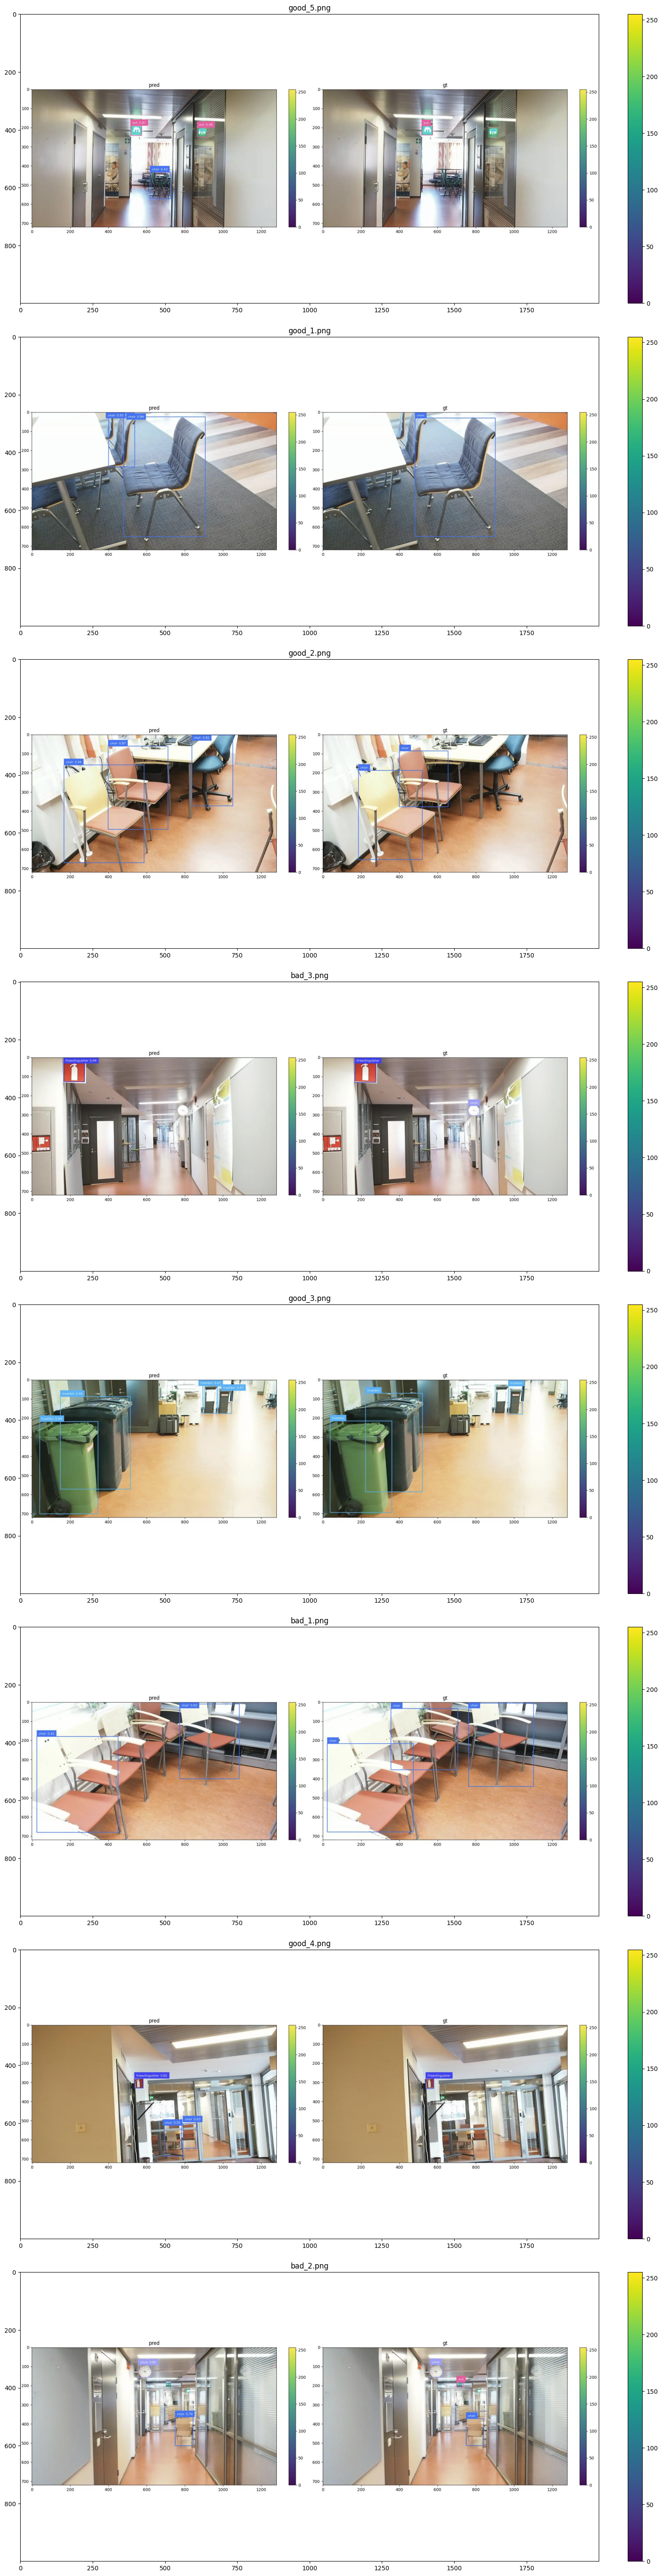

In [12]:
import cv2
import os
data_dir = './docs/examples'

images = {}
for img_name in os.listdir(data_dir):
  try:
    img = cv2.imread(os.path.join(data_dir, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images[img_name] = img
  except:
    pass

draw_plots(images)